In [ ]:
# © 2025 Dayita Chaudhuri and Velagapudi Athul
# All rights reserved. Joint work.

In [4]:
from scoring import analyze_survey_alignment, compute_similarity_per_theme

# 1. Temporal Similarity

### Indian States
Indian States of West Bengal, Telengana/Andhra Pradesh, Maharashtra, Uttar Pradesh, Bihar are considered for this analysis

In [5]:
# ALL RESPONSES
# ==========================

import pandas as pd
total_results = {}

for model in ['llama', 'aya', 'gemma']:
    total_results[model] = {}
    print(f"\n=== Model: {model} ===")
    for year in ['2022', '2012', '2006']:
        print(f"\n--- Year: {year} ---")
        results = analyze_survey_alignment(mode='country', year=year, country='india', region_wise=True, verbose=False, model=model)
        final_table = pd.DataFrame.from_dict(results, orient='index')
        final_table.index.name = 'Region'
        final_table.reset_index(inplace=True)
        final_table['State'] = final_table['Region'].apply(lambda x: x.split()[0].split('-')[1].capitalize())
        final_table = final_table[['State', 'Region', 'soft_metric', 'hard_metric']]
        print(final_table)
        total_results[model][year] = final_table


=== Model: llama ===

--- Year: 2022 ---
  State               Region  soft_metric  hard_metric
0    Br          in-br bihar     0.629619     0.247892
1    Dl          in-dl delhi     0.598989     0.206934
2    Hr        in-hr haryana     0.626940     0.242063
3    Mh    in-mh maharashtra     0.606802     0.192385
4    Pb         in-pb punjab     0.599901     0.198813
5    Tg      in-tg telangana     0.665371     0.252600
6    Up  in-up uttar pradesh     0.608324     0.207650
7    Wb    in-wb west bengal     0.634429     0.221328

--- Year: 2012 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)


  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.678863     0.260485
1    Br          in-br bihar     0.644394     0.268802
2    Dl          in-dl delhi     0.658408     0.234421
3    Hr        in-hr haryana     0.555752     0.211765
4    Mh    in-mh maharashtra     0.643530     0.225455
5    Up  in-up uttar pradesh     0.620633     0.225905
6    Wb    in-wb west bengal     0.644486     0.269231

--- Year: 2006 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)


  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.686842     0.282297
1    Br          in-br bihar     0.645335     0.267352
2    Dl          in-dl delhi     0.612941     0.188235
3    Mh    in-mh maharashtra     0.695098     0.329412
4    Pb         in-pb punjab     0.693987     0.305882
5    Up  in-up uttar pradesh     0.667242     0.265823
6    Wb    in-wb west bengal     0.674052     0.299401

=== Model: aya ===

--- Year: 2022 ---
  State               Region  soft_metric  hard_metric
0    Br          in-br bihar     0.671473     0.310287
1    Dl          in-dl delhi     0.687824     0.321777
2    Hr        in-hr haryana     0.675529     0.305556
3    Mh    in-mh maharashtra     0.671376     0.312625
4    Pb         in-pb punjab     0.657979     0.332344
5    Tg      in-tg telangana     0.719102     0.356612
6    Up  in-up uttar pradesh     0.697919     0.354198
7    Wb    in-wb west bengal     0.705209     0.366197

--- Year: 2012 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)


  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.716694     0.382372
1    Br          in-br bihar     0.702413     0.363278
2    Dl          in-dl delhi     0.663485     0.261128
3    Hr        in-hr haryana     0.647451     0.305882
4    Mh    in-mh maharashtra     0.679960     0.316364
5    Up  in-up uttar pradesh     0.667406     0.312420
6    Wb    in-wb west bengal     0.680284     0.341716

--- Year: 2006 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)


  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.693182     0.351675
1    Br          in-br bihar     0.665700     0.321337
2    Dl          in-dl delhi     0.605556     0.294118
3    Mh    in-mh maharashtra     0.722941     0.329412
4    Pb         in-pb punjab     0.692157     0.305882
5    Up  in-up uttar pradesh     0.649314     0.268987
6    Wb    in-wb west bengal     0.674185     0.329341

=== Model: gemma ===

--- Year: 2022 ---
  State               Region  soft_metric  hard_metric
0    Br          in-br bihar     0.640097     0.282462
1    Dl          in-dl delhi     0.677164     0.364030
2    Hr        in-hr haryana     0.650551     0.317460
3    Mh    in-mh maharashtra     0.596114     0.296593
4    Pb         in-pb punjab     0.678816     0.332344
5    Tg      in-tg telangana     0.671702     0.312036
6    Up  in-up uttar pradesh     0.655456     0.329856
7    Wb    in-wb west bengal     0.655924     0.334004

--- Year: 2012 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)


  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.726855     0.412844
1    Br          in-br bihar     0.698501     0.365367
2    Dl          in-dl delhi     0.701863     0.264095
3    Hr        in-hr haryana     0.647974     0.364706
4    Mh    in-mh maharashtra     0.660152     0.333636
5    Up  in-up uttar pradesh     0.655218     0.313998
6    Wb    in-wb west bengal     0.662845     0.340237

--- Year: 2006 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)


  State               Region  soft_metric  hard_metric
0    Tg      in-tg telangana     0.701130     0.368421
1    Br          in-br bihar     0.649481     0.316195
2    Dl          in-dl delhi     0.596078     0.305882
3    Mh    in-mh maharashtra     0.643791     0.258824
4    Pb         in-pb punjab     0.693725     0.364706
5    Up  in-up uttar pradesh     0.667449     0.288766
6    Wb    in-wb west bengal     0.692748     0.359281


### Countries
Russia, USA, Japan and India are considered for this analysis

In [ ]:
# AYA RESPONSES
# ==========================

import pandas as pd
from collections import defaultdict

countries = ['japan', 'US', 'india', 'russia', 'egypt', 'colombia']

print("\n--- Year: 2022 ---")

all_results_countries = defaultdict(list)
for country in countries:
    results = analyze_survey_alignment(country=country, year='2022', region_wise=False, verbose=False, model="aya")
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2022'].append(combined)
final_table = pd.DataFrame(all_results_countries['2022'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2012 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, year='2012', region_wise=False, verbose=False, model="aya")
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2012'].append(combined)
final_table = pd.DataFrame(all_results_countries['2012'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2006 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, year='2006', region_wise=False, verbose=False, model="aya")
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2006'].append(combined)

final_table = pd.DataFrame(all_results_countries['2006'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)


--- Year: 2022 ---
    Country  soft_metric  hard_metric
0     japan     0.754589     0.439204
1        US     0.734679     0.426064
2     india     0.689275     0.336207
3    russia     0.691741     0.352107
4     egypt     0.682506     0.328901
5  colombia     0.677347     0.335740

--- Year: 2012 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:291: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['urban_rural'] = [['urban', 'rural']] * len(df)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

    Country  soft_metric  hard_metric
0     japan     0.735152     0.391344
1        US     0.721321     0.410722
2     india     0.683691     0.334704
3    russia     0.682796     0.355129
4     egypt     0.665053     0.283784
5  colombia     0.683199     0.354610

--- Year: 2006 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

    Country  soft_metric  hard_metric
0     japan     0.729739     0.321267
1        US     0.731364     0.419312
2     india     0.664332     0.304680
3    russia     0.663960     0.298595
4     egypt     0.718529     0.325779
5  colombia     0.688871     0.344611


In [ ]:
# LLAMA RESPONSES
# ==========================

import pandas as pd
from collections import defaultdict

countries = ['japan', 'US', 'india', 'russia', 'egypt', 'colombia']

print("\n--- Year: 2022 ---")

all_results_countries = defaultdict(list)
for country in countries:
    results = analyze_survey_alignment(country=country, year='2022', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2022'].append(combined)
final_table = pd.DataFrame(all_results_countries['2022'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2012 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, year='2012', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2012'].append(combined)
final_table = pd.DataFrame(all_results_countries['2012'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2006 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, year='2006', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2006'].append(combined)

final_table = pd.DataFrame(all_results_countries['2006'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)


--- Year: 2022 ---
    Country  soft_metric  hard_metric
0     japan     0.713568     0.345615
1        US     0.684116     0.312857
2     india     0.619154     0.220533
3    russia     0.673729     0.296647
4     egypt     0.650756     0.202664
5  colombia     0.592155     0.186735

--- Year: 2012 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:291: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['urban_rural'] = [['urban', 'rural']] * len(df)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

    Country  soft_metric  hard_metric
0     japan     0.710315     0.306583
1        US     0.674359     0.317235
2     india     0.637318     0.242193
3    russia     0.677812     0.297312
4     egypt     0.655446     0.255137
5  colombia     0.649039     0.258934

--- Year: 2006 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

    Country  soft_metric  hard_metric
0     japan     0.717019     0.266968
1        US     0.684715     0.312831
2     india     0.662692     0.271031
3    russia     0.649460     0.278689
4     egypt     0.699425     0.281102
5  colombia     0.636078     0.263069


In [9]:
# GEMMA RESPONSES
# ==========================

import pandas as pd
from collections import defaultdict

countries = ['japan', 'US', 'india', 'russia', 'egypt', 'colombia']

print("\n--- Year: 2022 ---")

all_results_countries = defaultdict(list)
for country in countries:
    results = analyze_survey_alignment(country=country, year='2022', model='gemma', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2022'].append(combined)
final_table = pd.DataFrame(all_results_countries['2022'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2012 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, year='2012', model='gemma', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2012'].append(combined)
final_table = pd.DataFrame(all_results_countries['2012'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)

print("\n--- Year: 2006 ---")
for country in countries:
    results = analyze_survey_alignment(country=country, year='2006', model='gemma', region_wise=False, verbose=False)
    combined = {
        'Country': country,
        'soft_metric': results.get('soft_metric'),
        'hard_metric': results.get('hard_metric')
    }
    all_results_countries['2006'].append(combined)

final_table = pd.DataFrame(all_results_countries['2006'], columns=['Country', 'soft_metric', 'hard_metric'])
print(final_table)


--- Year: 2022 ---
    Country  soft_metric  hard_metric
0     japan     0.776615     0.426676
1        US     0.773124     0.470382
2     india     0.653891     0.321473
3    russia          NaN          NaN
4     egypt     0.727477     0.392730
5  colombia     0.739079     0.402527

--- Year: 2012 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:291: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['urban_rural'] = [['urban', 'rural']] * len(df)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

    Country  soft_metric  hard_metric
0     japan     0.787161     0.413886
1        US     0.734197     0.406292
2     india     0.677091     0.341914
3    russia     0.713362     0.351281
4     egypt     0.735084     0.333615
5  colombia     0.722738     0.365248

--- Year: 2006 ---


/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

    Country  soft_metric  hard_metric
0     japan     0.768167     0.353695
1        US     0.754905     0.415344
2     india     0.665254     0.314163
3    russia     0.711620     0.355372
4     egypt     0.724373     0.343720
5  colombia     0.730702     0.407553


# 2. Theme Similarity

### Indian States
Indian States of West Bengal, Telangana/Andhra Pradesh, Maharashtra, Uttar Pradesh, Bihar are considered for this analysis

In [24]:
years = ['2006', '2012', '2022']
models = ['llama', 'aya', 'gemma']

res = {}
for year in years:
    res[year] = {}
    for model in models:
        res[year][model] = compute_similarity_per_theme(country='india', year=year, region_wise=True, verbose=False)
        
import json
with open('theme_temporal_results.json', 'w') as f:
    json.dump(res, f, indent=4)

/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

/var/folders/nz/z1fxd0ps6vjf1nb904g0py9r0000gn/T/ipykernel_90528/1539762182.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


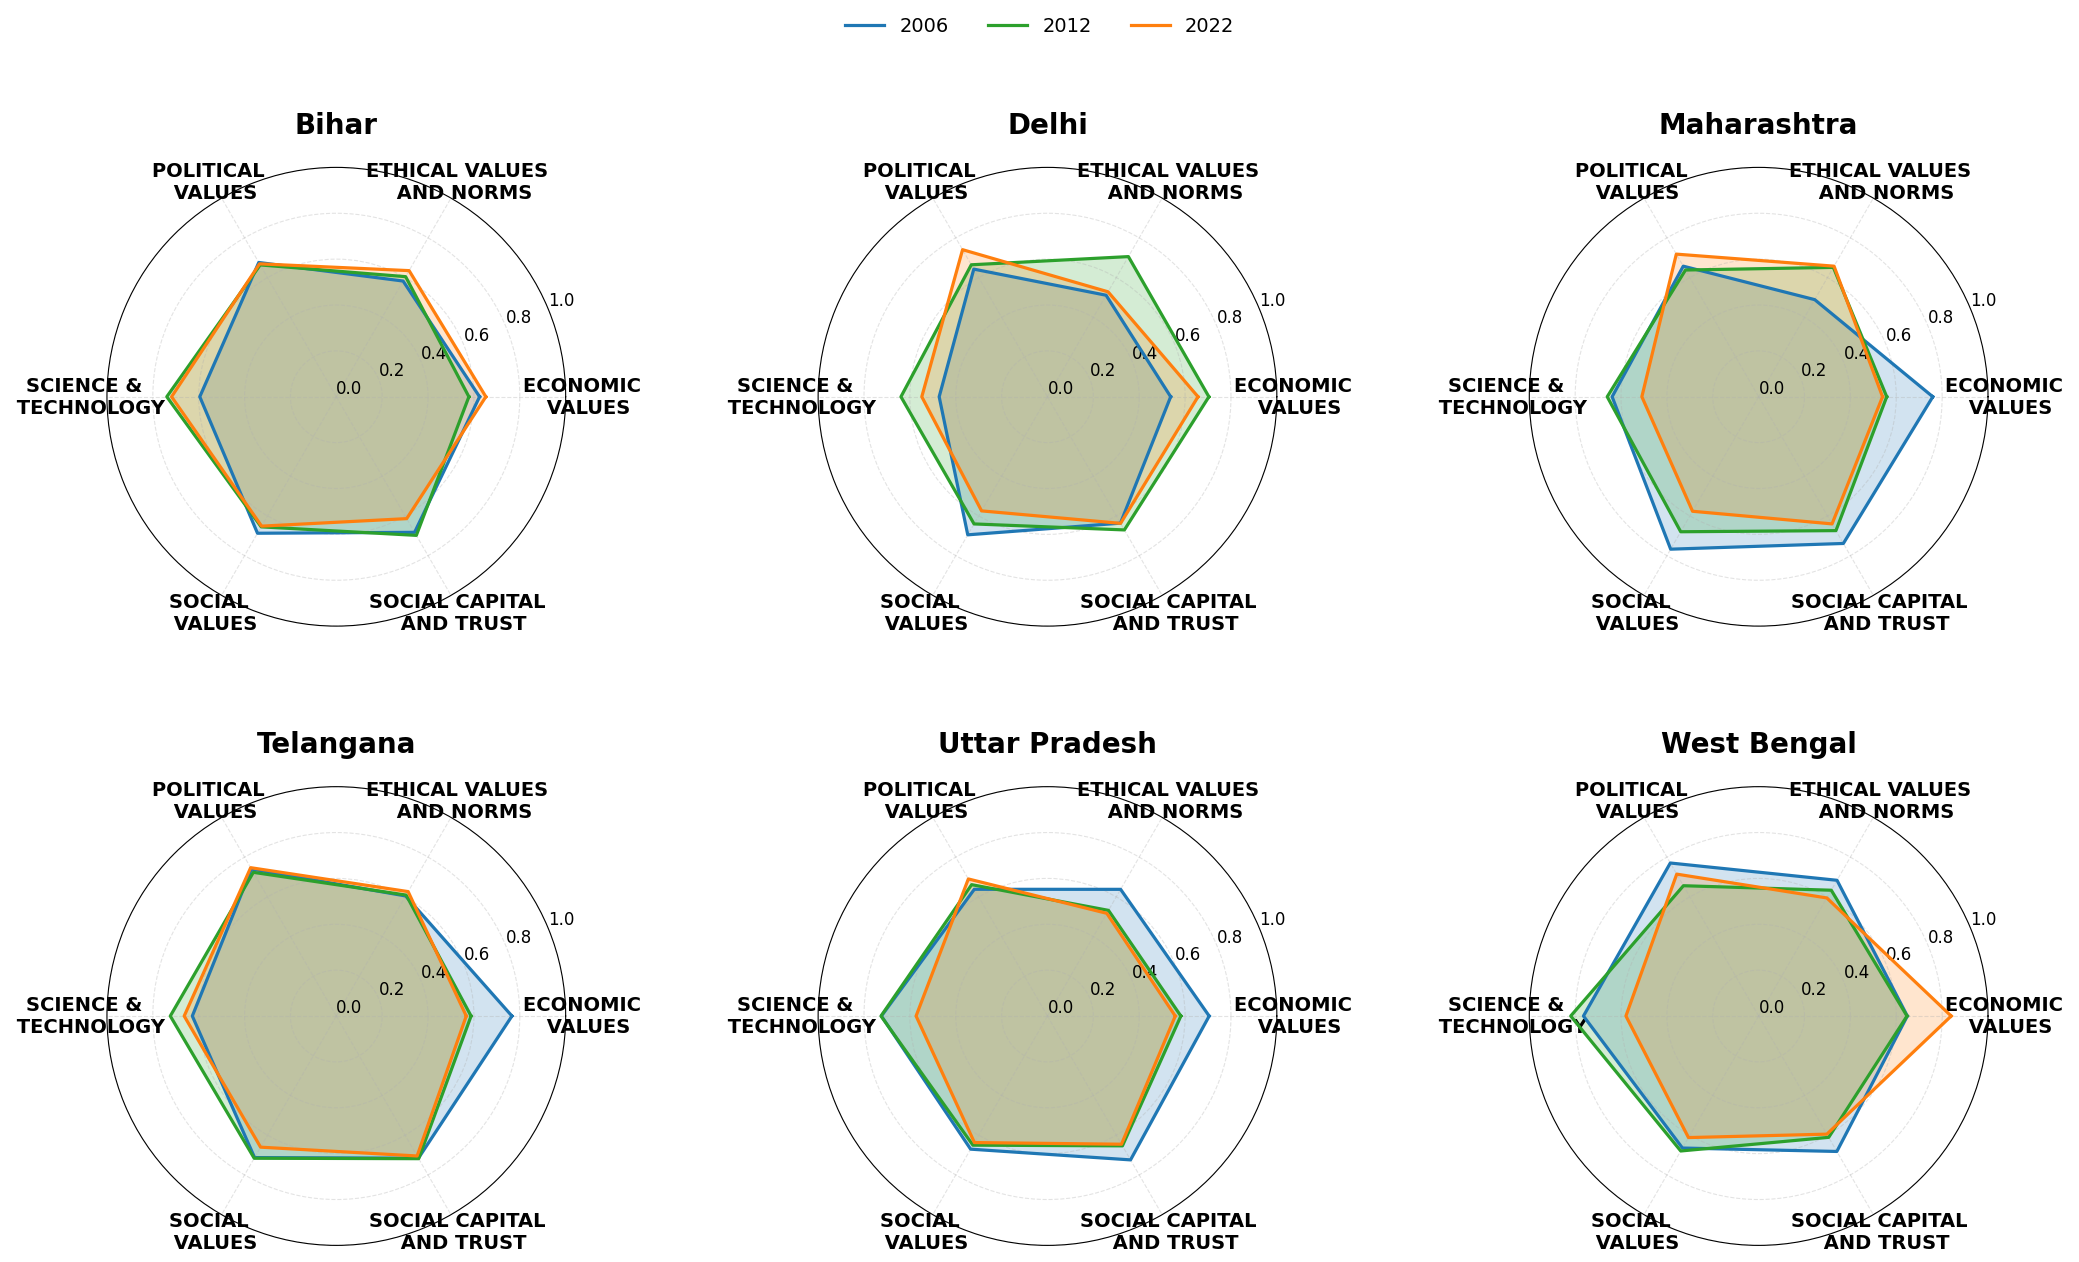

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

cmap = cm.get_cmap('tab10')
year_colors = {
    '2006': cmap(0),  
    '2012': cmap(2),  
    '2022': cmap(1)   
}
states = {
 "Bihar": 'in-br bihar',
 "Delhi": 'in-dl delhi',
 "Maharashtra": 'in-mh maharashtra',
 "Telangana": 'in-tg telangana',
 "Uttar Pradesh": 'in-up uttar pradesh',
 "West Bengal": 'in-wb west bengal'
}

TITLE_SIZE = 20
LABEL_SIZE = 14
TICK_LABEL_SIZE = 12
LEGEND_SIZE = 14

valid_themes = set()
for year in years:
    for statename, state in states.items():
        theme_scores = res[year].get(state, {}).get("per_theme", {})
        theme_counts = res[year].get(state, {}).get("per_theme_counts", {})
        for theme, score in theme_scores.items():
            if isinstance(score, float) and theme_counts.get(theme, 0) > 1:
                valid_themes.add(theme)

ordered_themes = sorted(list(valid_themes))
num_vars = len(ordered_themes)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(2, 3, figsize=(26, 14), subplot_kw=dict(polar=True))
axes = axes.flatten()
fig.patch.set_facecolor("#ffffff")
fig.subplots_adjust(hspace=0.35)

idx = 0
for statename, state in states.items():
    ax = axes[idx]
    ax.set_title(f"{statename}", fontsize=TITLE_SIZE, fontweight='bold', pad=25)

    for year in years:
        theme_scores = res[year].get(state, {}).get("per_theme", {})
        theme_counts = res[year].get(state, {}).get("per_theme_counts", {})

        values = []
        for theme in ordered_themes:
            if theme_counts.get(theme, 0) > 1 and isinstance(theme_scores.get(theme), float):
                values.append(theme_scores[theme])
            else:
                values.append(0.0)

        values += values[:1]
        ax.plot(angles, values, linewidth=2.3, color=year_colors[year], label=year)
        ax.fill(angles, values, alpha=0.20, color=year_colors[year])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(ordered_themes, fontsize=LABEL_SIZE, fontweight='bold')

    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        label.set_rotation(np.degrees(angle))
        label.set_horizontalalignment('center')

    ax.set_ylim(0, 1)
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=TICK_LABEL_SIZE)
    ax.grid(True, linestyle='dashed', alpha=0.35)
    idx += 1

if len(states) < 6:
    for j in range(len(states), 6):
        axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(years), fontsize=LEGEND_SIZE, frameon=False)
plt.show()

### Countries

In [25]:
years = ['2006', '2012', '2022']
countries = ['japan', 'US', 'india', 'russia', 'egypt', 'colombia']
models = ['llama', 'aya', 'gemma']

res_countries = {}
for year in years:
    res_countries[year] = {}
    for model in models:
        res_countries[year][model] = {}
        for country in countries:
            res_countries[year][model][country] = compute_similarity_per_theme(country=country, year=year, region_wise=False, verbose=False)
        
import json
with open('country_theme_temporal_results.json', 'w') as f:
    json.dump(res_countries, f, indent=4)

/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_map_v_to_q, inplace=True)
/Users/dayita/Documents/Projects/NLP_Projects/Ethics/Untitled/evaluation/scoring.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

/var/folders/nz/z1fxd0ps6vjf1nb904g0py9r0000gn/T/ipykernel_90528/1817982913.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


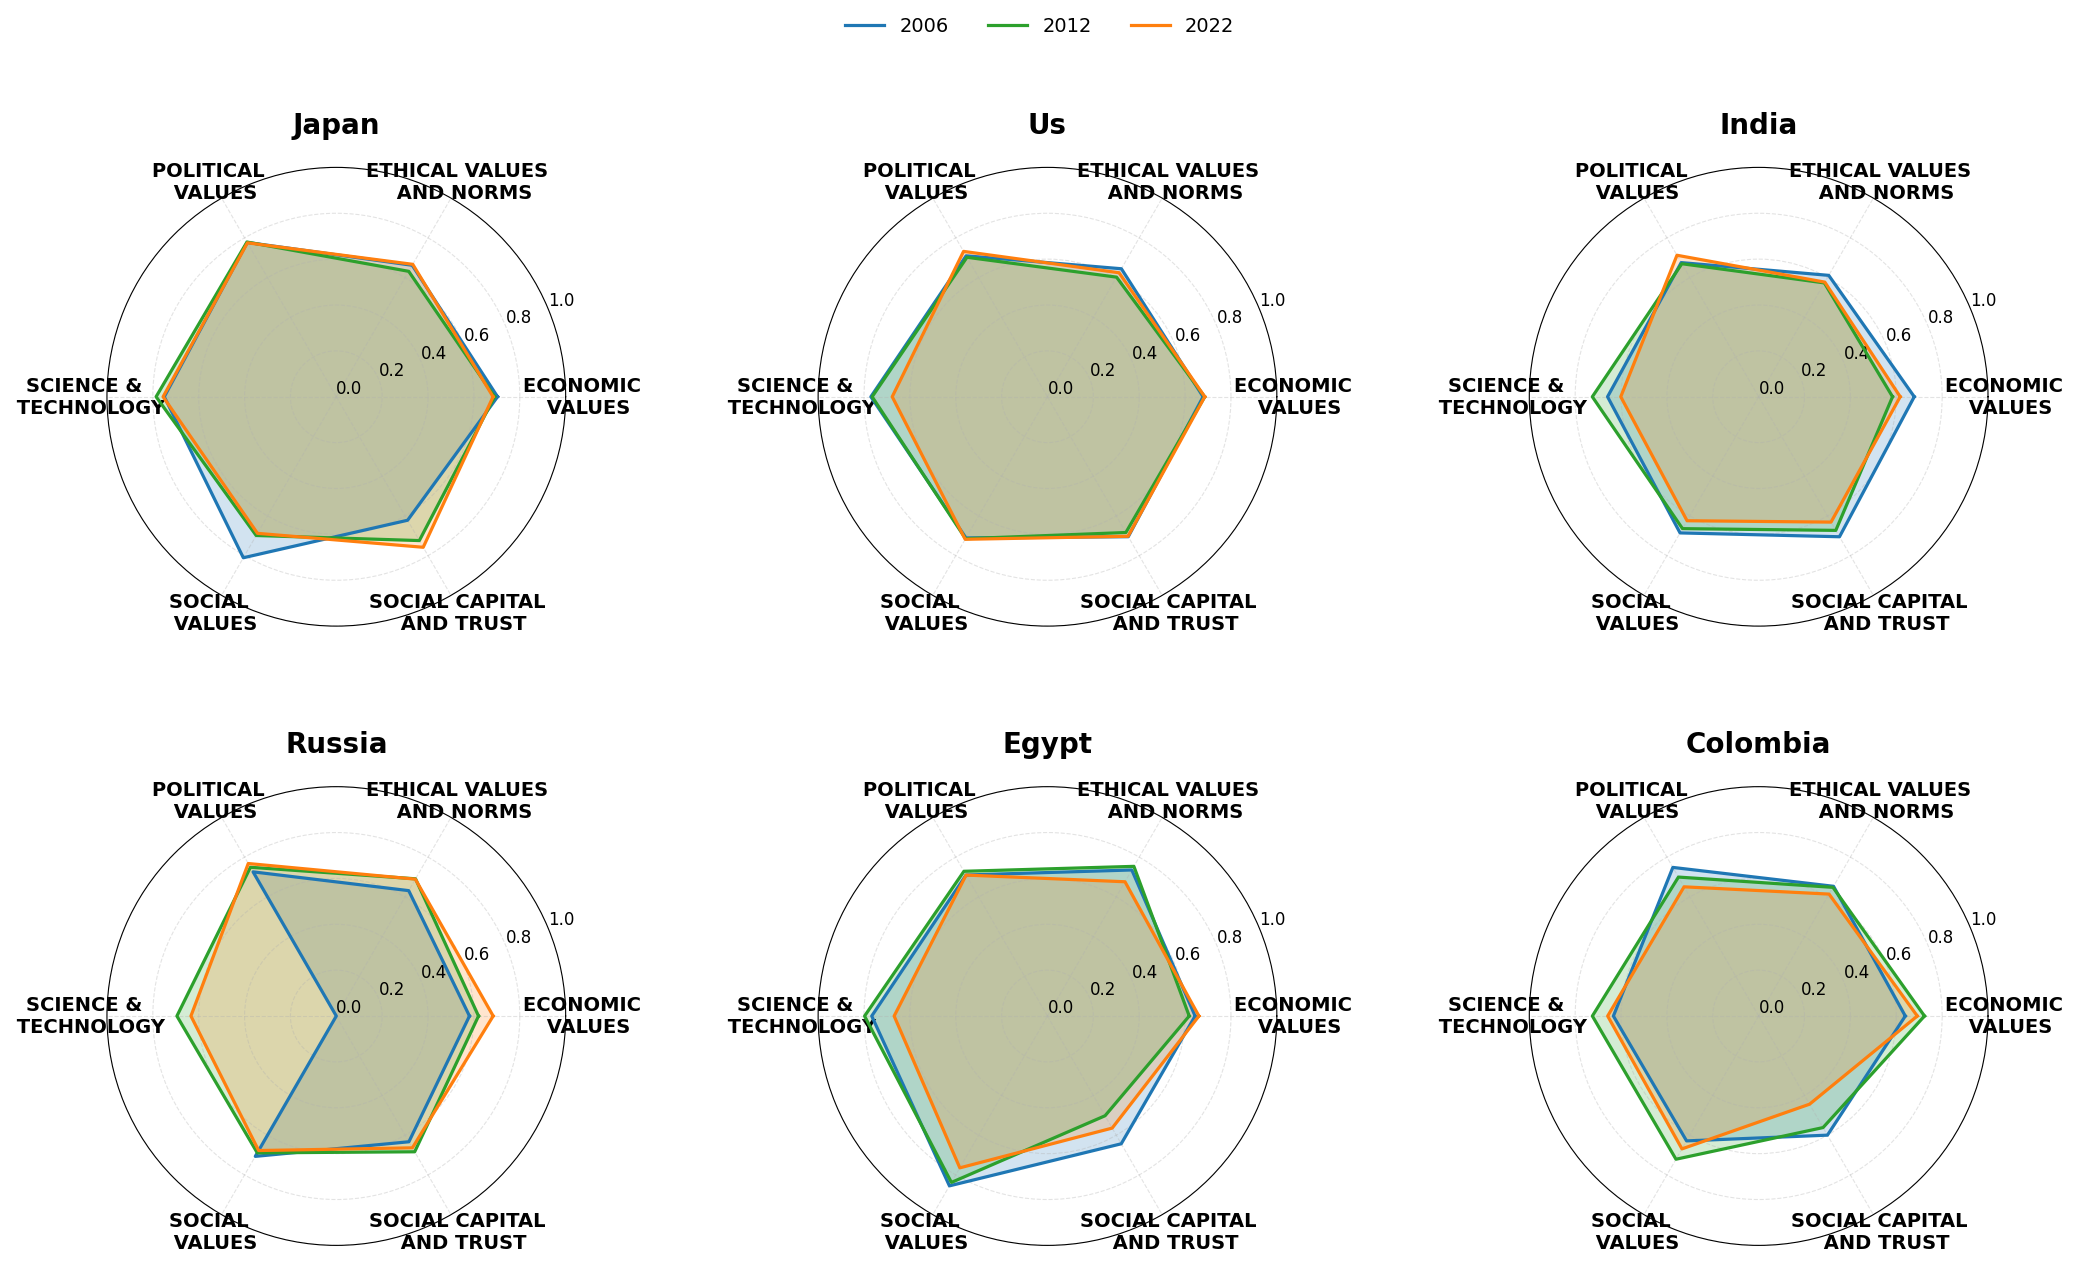

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

cmap = cm.get_cmap('tab10')
year_colors = {
    '2006': cmap(0),  
    '2012': cmap(2),  
    '2022': cmap(1)   
}

TITLE_SIZE = 20
LABEL_SIZE = 14
TICK_LABEL_SIZE = 12
LEGEND_SIZE = 14

valid_themes = set()
for year in years:
    for country in countries:
        theme_scores = res[(year, country)].get("per_theme", {})
        theme_counts = res[(year, country)].get("per_theme_counts", {})
        for theme, score in theme_scores.items():
            if isinstance(score, float) and theme_counts.get(theme, 0) > 1:
                valid_themes.add(theme)

ordered_themes = sorted(list(valid_themes))
num_vars = len(ordered_themes)
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, axes = plt.subplots(2, 3, figsize=(26, 14), subplot_kw=dict(polar=True))
axes = axes.flatten()
fig.patch.set_facecolor("#ffffff")
fig.subplots_adjust(hspace=0.35)

idx = 0
for country in countries:
    ax = axes[idx]
    ax.set_title(f"{country.capitalize()}", fontsize=TITLE_SIZE, fontweight='bold', pad=25)

    for year in years:
        theme_scores = res[(year, country)].get("per_theme", {})
        theme_counts = res[(year, country)].get("per_theme_counts", {})

        values = []
        for theme in ordered_themes:
            if theme_counts.get(theme, 0) > 1 and isinstance(theme_scores.get(theme), float):
                values.append(theme_scores[theme])
            else:
                values.append(0.0)

        values += values[:1]
        ax.plot(angles, values, linewidth=2.3, color=year_colors[year], label=year)
        ax.fill(angles, values, alpha=0.20, color=year_colors[year])

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(ordered_themes, fontsize=LABEL_SIZE, fontweight='bold')

    for label, angle in zip(ax.get_xticklabels(), angles[:-1]):
        label.set_rotation(np.degrees(angle))
        label.set_horizontalalignment('center')

    ax.set_ylim(0, 1)
    ax.set_yticks(np.linspace(0, 1, 6))
    ax.set_yticklabels([f"{x:.1f}" for x in np.linspace(0, 1, 6)], fontsize=TICK_LABEL_SIZE)
    ax.grid(True, linestyle='dashed', alpha=0.35)
    idx += 1

if len(states) < 6:
    for j in range(len(states), 6):
        axes[j].axis('off')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(years), fontsize=LEGEND_SIZE, frameon=False)
plt.show()